In [1]:
!pip install opencv-python 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import cv2 as cv 
img = cv.imread("/content/mysore_palace.jpg") 

In [5]:
img.shape

(593, 1280, 3)

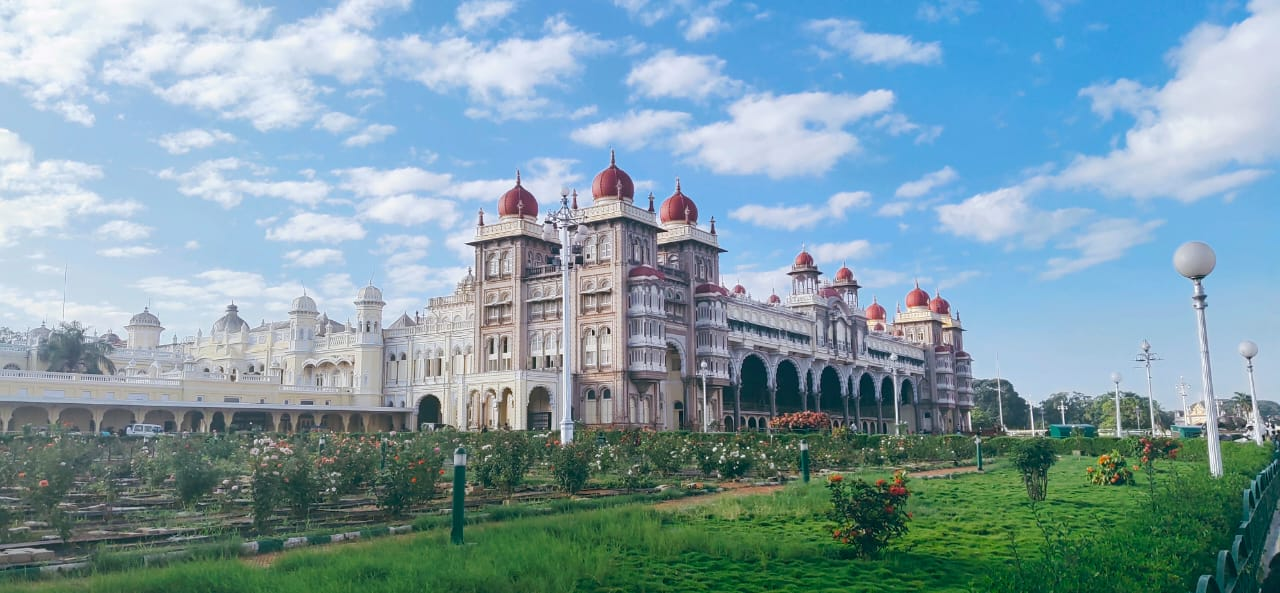

In [6]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

## Image Negative

In [8]:
negative = []  # Initialize list to store negative image

# Traverse through the height of the image
for i in range(img.shape[0]):
    new_image = []  # Initialize list to store new row of pixels
    # Traverse through the width of the image
    for j in range(img.shape[1]):
        new_row = []  # Initialize list to store new pixel values in a row
        # Traverse through each channel (color) of the pixel
        for k in range(img.shape[2]):
            # Calculate the complement of a pixel
            new_pixel = 255 - img[i][j][k]
            new_row.append(new_pixel)  # Append new pixel to the row
        new_image.append(new_row)  # Append new row to the image
    negative.append(new_image)  # Append new image to the list of negative images

In [9]:
import numpy as np

# Convert list of negative images to a NumPy array
negative_array = np.array(negative)

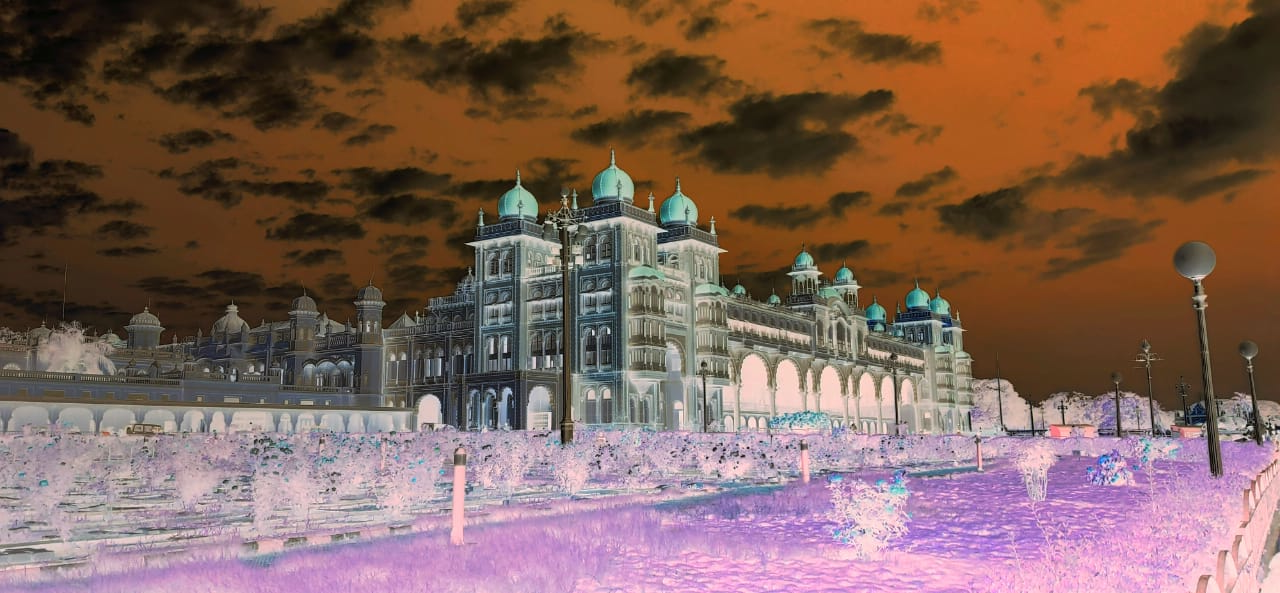

In [10]:
cv2_imshow(negative)

**Note on Negative Transformation**

The negative of an image is typically understood as the inversion of its colors. However, the method of obtaining the negative varies depending on whether the image is grayscale or color.

* **Grayscale Images**: In grayscale images, the negative is obtained by subtracting each pixel's intensity value from the maximum intensity value (typically 255 for 8-bit images).

* **Color Images (RGB)**: For color images represented in RGB format, each pixel has three components: red, green, and blue. To obtain the negative of a color image, we subtract each component of every pixel from the maximum intensity value (255).

It's important to note that if a color image's negative is calculated without converting it back to grayscale, the result will differ slightly from the negative of a grayscale image. This is due to the distinct treatment of color channels in the RGB space.

## Converting Color Image to Grey Scale

In [11]:
import numpy as np

grey_image = []  # Initialize list to store grayscale image

# Traverse through all rows of the image
for i in range(img.shape[0]):
    pixels = []  # Initialize list to store grayscale pixels in a row
    # Traverse through all columns of the image
    for j in range(img.shape[1]):
        # Apply the formula to convert each RGB pixel into an equivalent grayscale pixel
        grey_pixel = 0.114 * img[i][j][0] + 0.587 * img[i][j][1] + 0.299 * img[i][j][2]
        pixels.append(grey_pixel)  # Append grayscale pixel to the row
    grey_image.append(pixels)  # Form grayscale array

# Convert list of grayscale images to a NumPy array
grey_image = np.array(grey_image)

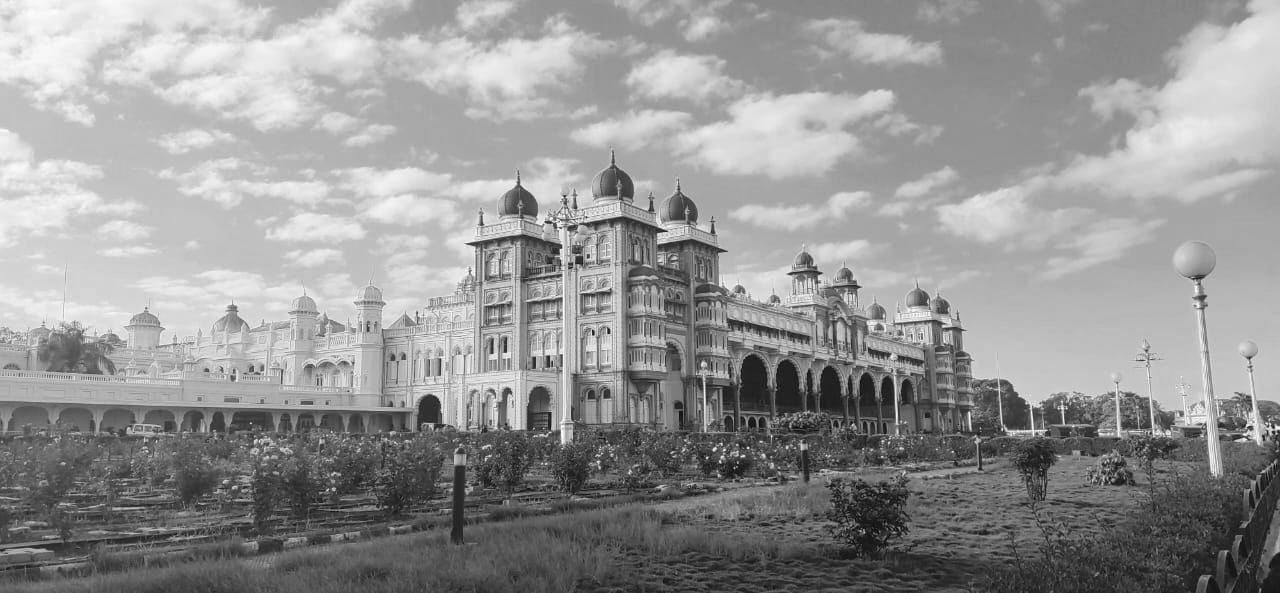

In [12]:
cv2_imshow(grey_image)

## Negative of A Grey Scale Image

In [14]:
new_negative = 255 - grey_image  # Calculate the negative of the grayscale image
grey_image

array([[234.335, 236.335, 238.335, ..., 201.756, 200.756, 200.756],
       [235.335, 237.335, 239.335, ..., 200.756, 200.756, 200.756],
       [231.036, 234.036, 238.036, ..., 200.756, 199.756, 199.756],
       ...,
       [ 99.954,  99.954, 100.954, ...,  28.219,  26.621,  25.92 ],
       [ 96.943,  97.943,  98.943, ...,  28.219,  27.219,  25.92 ],
       [ 99.003,  94.003,  97.231, ...,  24.703,  23.703,  24.29 ]])

In [15]:
new_negative # displaying negative image pixel values

array([[ 20.665,  18.665,  16.665, ...,  53.244,  54.244,  54.244],
       [ 19.665,  17.665,  15.665, ...,  54.244,  54.244,  54.244],
       [ 23.964,  20.964,  16.964, ...,  54.244,  55.244,  55.244],
       ...,
       [155.046, 155.046, 154.046, ..., 226.781, 228.379, 229.08 ],
       [158.057, 157.057, 156.057, ..., 226.781, 227.781, 229.08 ],
       [155.997, 160.997, 157.769, ..., 230.297, 231.297, 230.71 ]])

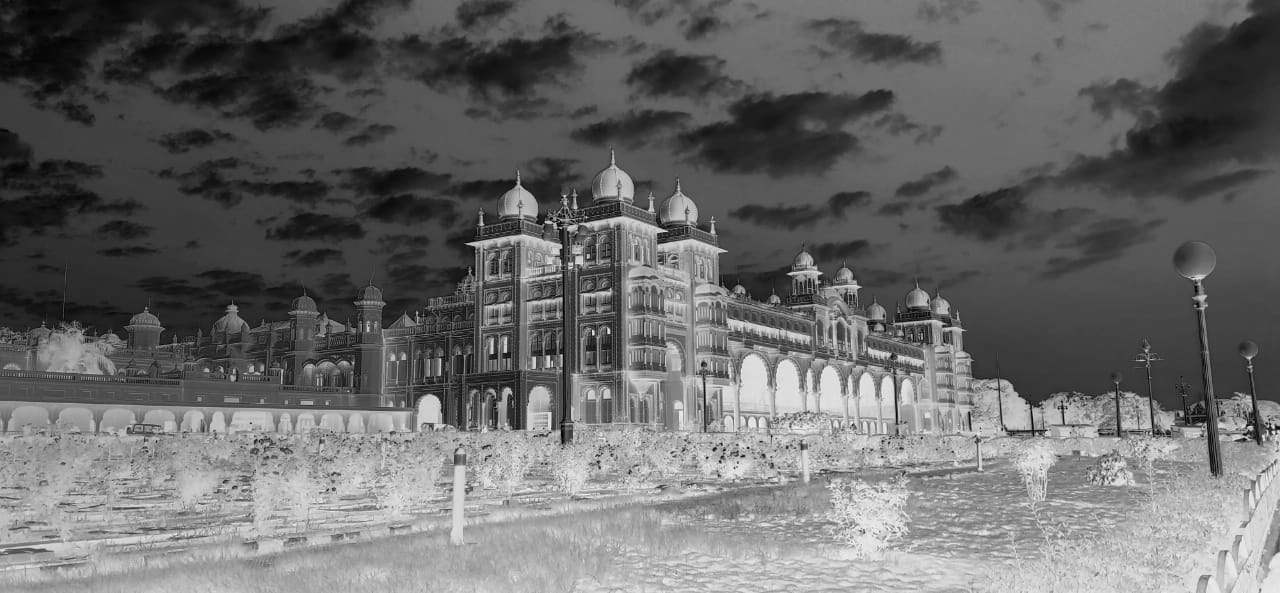

In [16]:
cv2_imshow(new_negative) # displaying the negative of a grey scale image

## Log Transformations

**Understanding Log Transformation**

The log transformation is a commonly used method in image processing for enhancing the dynamic range of images. It's defined by the formula:

\[ s = c log(r + 1) \]

Where \( s \) and \( r \) are the pixel values of the output and input image respectively, and \( c \) is a constant. The addition of 1 to each pixel value of the input image is crucial. This step is necessary because if there is a pixel intensity of 0 in the image, then \(log(0)\) is undefined (equal to negative infinity). Adding 1 ensures that the minimum value is at least 1, preventing undefined results.

During the log transformation, the dark pixels in an image are expanded compared to the higher pixel values. This means that the darker regions of the image become more distinguishable while the brighter regions are compressed. As a result, log transformation often enhances image details, particularly in shadowed areas.

This technique is particularly useful for images with a wide range of intensity values, such as those with high contrast or extreme lighting conditions.

In [17]:
c = 1  # Specify constant value
log_image = c * np.log(grey_image + 1)  # Apply the log transformation formula

In [18]:
log_image # Values of the logf image

array([[5.46101003, 5.46947265, 5.47786424, ..., 5.31200329, 5.30705905,
        5.30705905],
       [5.46525029, 5.47367725, 5.48203378, ..., 5.30705905, 5.30705905,
        5.30705905],
       [5.44689253, 5.45973869, 5.47661417, ..., 5.30705905, 5.30209024,
        5.30209024],
       ...,
       [4.61466497, 4.61466497, 4.62452173, ..., 3.37481918, 3.31857635,
        3.2928695 ],
       [4.58438568, 4.59454393, 4.60460002, ..., 3.37481918, 3.33999551,
        3.2928695 ],
       [4.60520019, 4.55390847, 4.58732185, ..., 3.24660772, 3.20692469,
        3.23040906]])

In [19]:
# Rescale values to the range of 0 to 255
log_image = log_image / np.max(log_image) * 255

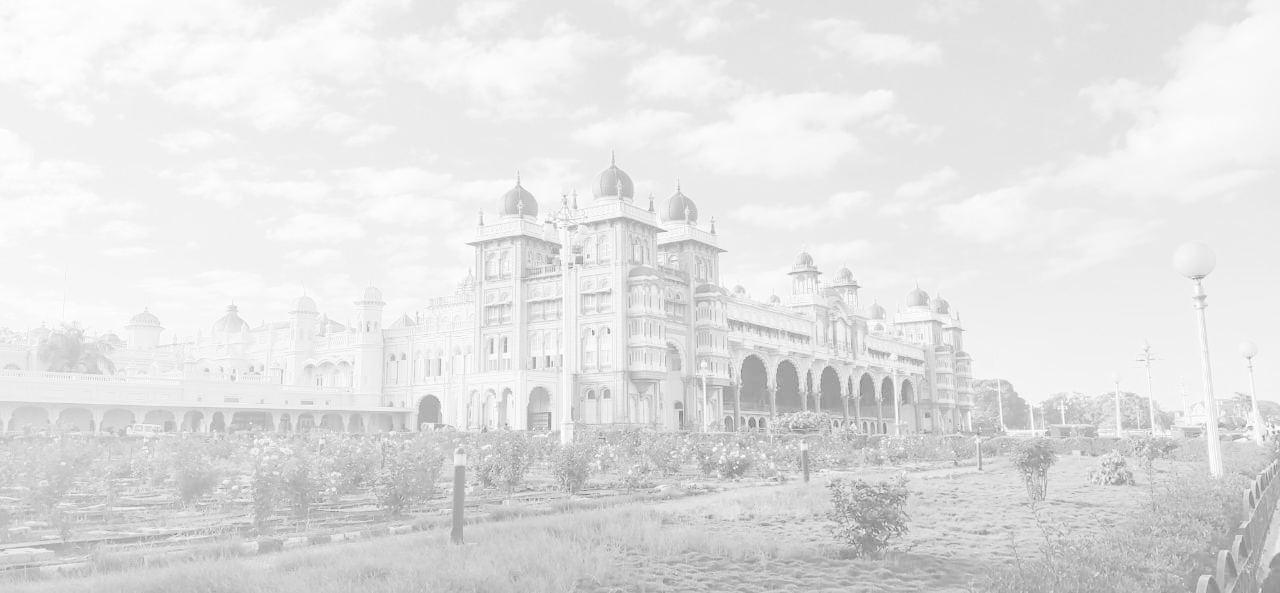

In [20]:
cv2_imshow(log_image) # Displaying the log image

**Effects of Log Transformation**

The log transformation applied to an image can have significant effects on its pixel values and overall appearance:

* **Enhancement of Dark Pixels**: Dark pixels in the image are typically expanded or stretched, resulting in increased contrast and visibility of details in shadowed areas. This stretching of the dark pixel range can reveal subtle features that were previously obscured.

* **Compression of Light Pixels**: Conversely, the range of light pixels is often compressed or reduced. This means that the differences between bright areas of the image become less pronounced. While this compression might obscure some details in the highlights, it can also help to balance the overall tonal distribution of the image.

By stretching the range of dark pixels and compressing the range of light pixels, the log transformation aims to improve the overall contrast and enhance image details, particularly in areas of low intensity. However, it's essential to adjust the parameters carefully to avoid over-enhancement or loss of image information.

## Inverse log Transformations

**Understanding Inverse Log Transformation**

The inverse log transformation is a technique used in image processing to manipulate the pixel values of an image. It is defined by the formula:

\[ s = c(b^r - 1) \]

Where \( s \) and \( r \) represent the pixel values of the output and input images respectively, and \( c \) and \( b \) are constants. Similar to the log transformation, subtracting 1 from each pixel value of the input image ensures that the minimum value is at least 1, thus preventing undefined results.

During the inverse log transformation, the light pixels in an image are expanded relative to the lower pixel values. This means that the differences between bright areas of the image become more pronounced, while the darker regions may appear compressed. As a result, the inverse log transformation can be used to enhance the details in brighter areas of the image, similar to how the log transformation enhances details in darker areas.

This technique is particularly useful for adjusting the contrast and tonal range of images with uneven lighting conditions or when specific features need to be emphasized.

In [21]:
b = 1.02  # Set value for b
c = 1     # Set value for c
inverse_log_image = c * (b ** grey_image - 1)  # Apply the formula for inverse log image

In [22]:
# Rescale values to the range of 0 to 255
inverse_log_image = inverse_log_image / np.max(inverse_log_image) * 255

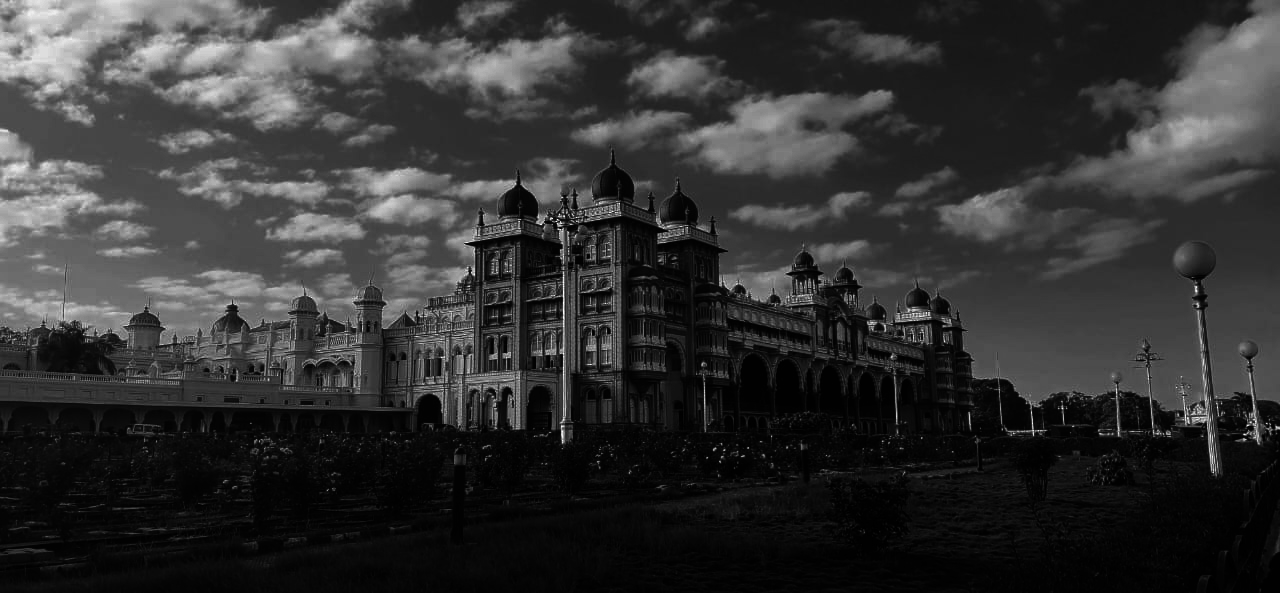

In [23]:
cv2_imshow(inverse_log_image) # Displaying Inverse log image

## Gamma Correction

**Understanding Power-law Transform (Gamma Correction)**

The power-law transform, also known as gamma correction, is a technique used to adjust the overall brightness and contrast of an image. It is defined by the formula:

\[ q = c \times a^{\gamma} \]

Where:
- \( q \) represents the pixel values of the output image.
- \( a \) represents the pixel values of the input image.
- \( c \) and \( \gamma \) are constants greater than zero.

Gamma correction is particularly useful for images that appear either bleached out (overexposed) or too dark (underexposed). By adjusting the gamma value, you can control the brightness and contrast of the image.

* **Gamma Value (\( \gamma \))**: Increasing the gamma value (>1) will darken the image and increase contrast. Conversely, decreasing the gamma value (<1) will brighten the image and decrease contrast.

* **Constants \( c \) and \( \gamma \)**: These constants allow for fine-tuning the transformation. \( c \) scales the pixel values, while \( \gamma \) controls the shape of the transformation curve.

* **Expansion and Compression**: Gamma correction can expand or compress pixel intensity values, making it effective for enhancing details in darker areas (expansion) or compensating for overexposure in brighter areas (compression).

By adjusting the gamma value and constants \( c \) and \( \gamma \), we can tailor the power-law transform to suit the specific characteristics of the image and achieve the desired enhancement.

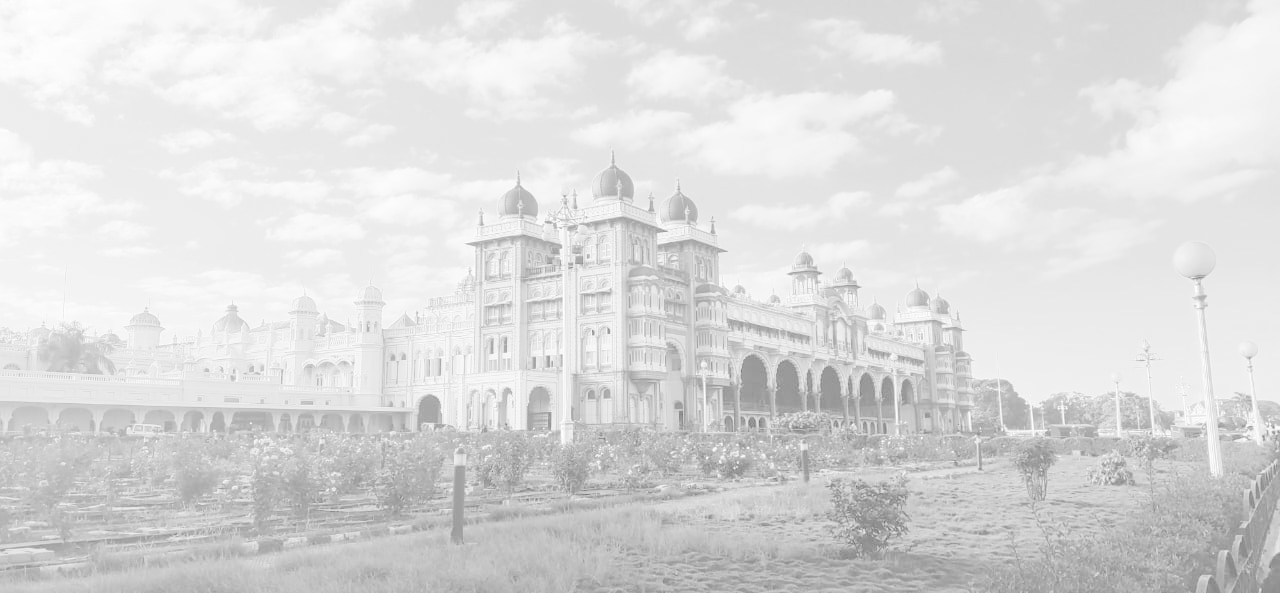

In [24]:
gamma = 0.25  # Set value for gamma
c = 1        # Set value for c

# Applying gamma correction
gamma_image = c * grey_image ** gamma

# Rescale values to the range of 0 to 255
gamma_image = gamma_image / np.max(gamma_image) * 255

# Displaying the transformed image
from google.colab.patches import cv2_imshow
cv2_imshow(gamma_image)

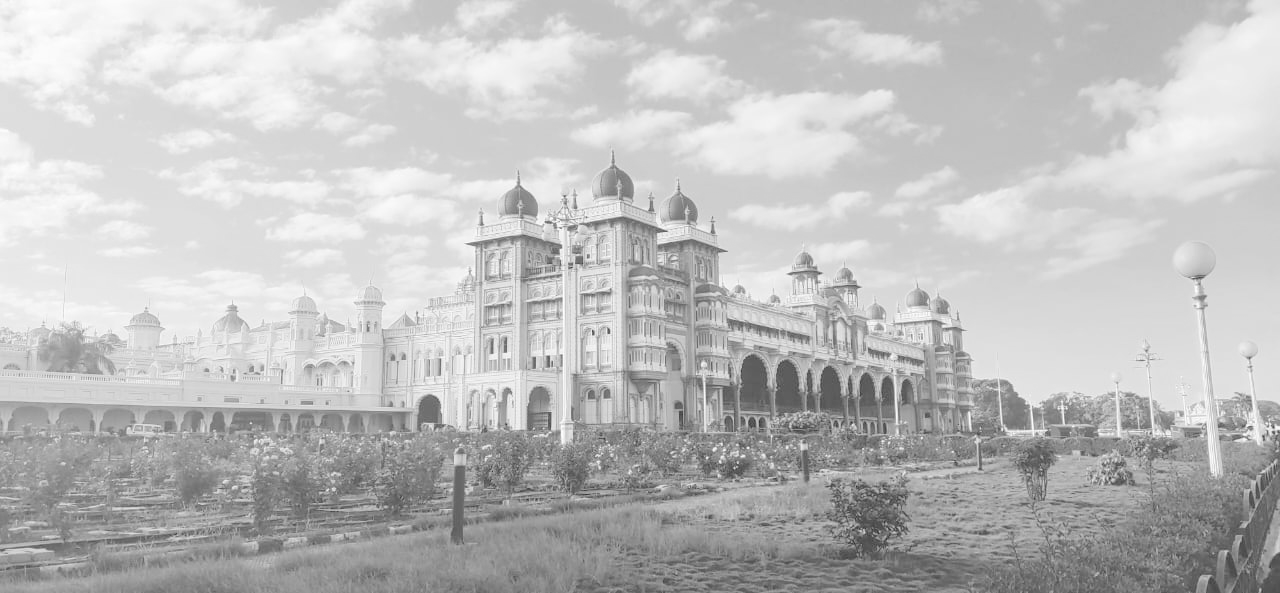

In [25]:
gamma = 0.5  # Set value for gamma
c = 1        # Set value for c

# Applying gamma correction
gamma_image = c * grey_image ** gamma

# Rescale values to the range of 0 to 255
gamma_image = gamma_image / np.max(gamma_image) * 255

# Displaying the transformed image
from google.colab.patches import cv2_imshow
cv2_imshow(gamma_image)

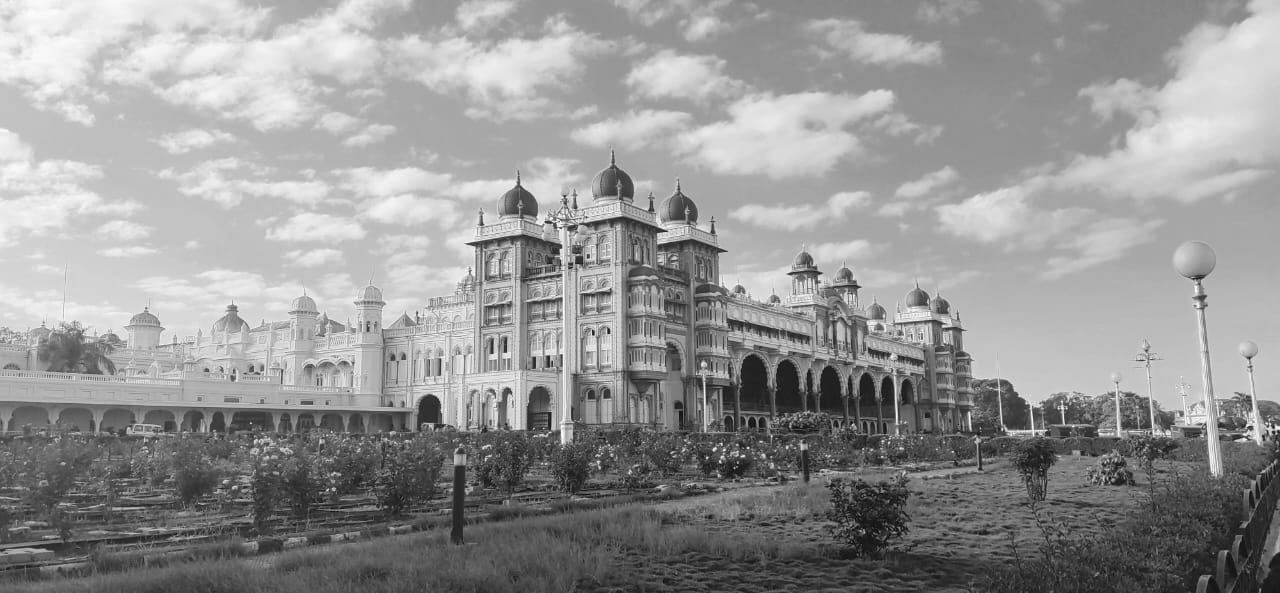

In [26]:
gamma = 1    # Set value for gamma
c = 1        # Set value for c

# Applying gamma correction
gamma_image = c * grey_image ** gamma

# Rescale values to the range of 0 to 255
gamma_image = gamma_image / np.max(gamma_image) * 255

# Displaying the transformed image
from google.colab.patches import cv2_imshow
cv2_imshow(gamma_image)

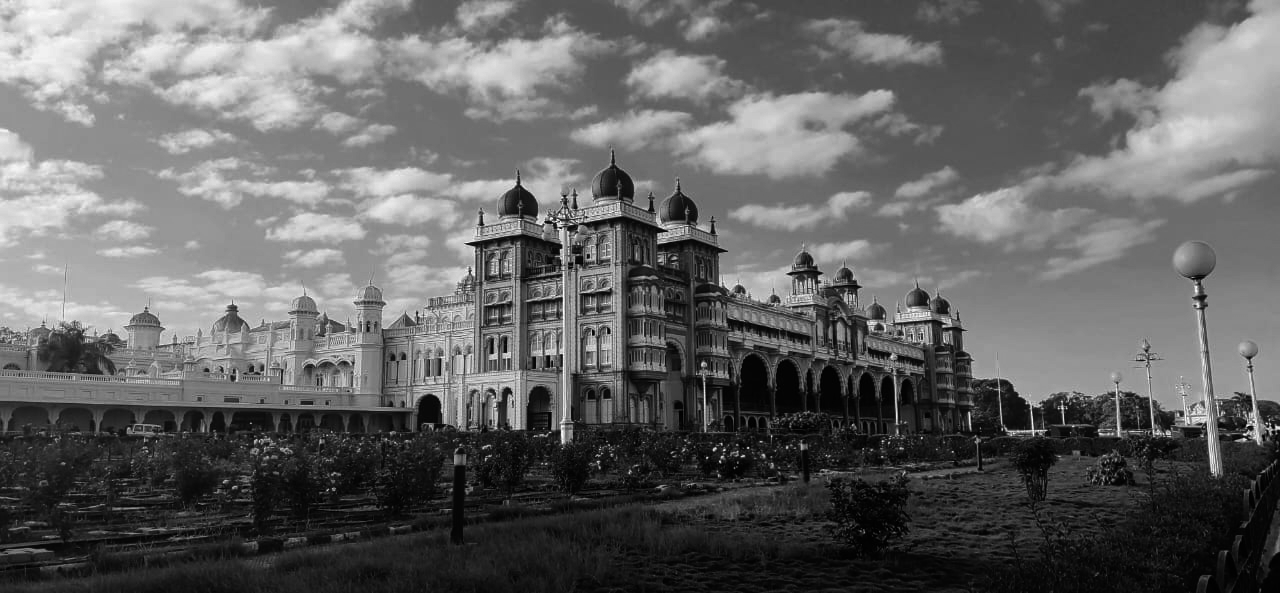

In [27]:
gamma = 2    # Set value for gamma
c = 1        # Set value for c

# Applying gamma correction
gamma_image = c * grey_image ** gamma

# Rescale values to the range of 0 to 255
gamma_image = gamma_image / np.max(gamma_image) * 255

# Displaying the transformed image
from google.colab.patches import cv2_imshow
cv2_imshow(gamma_image)

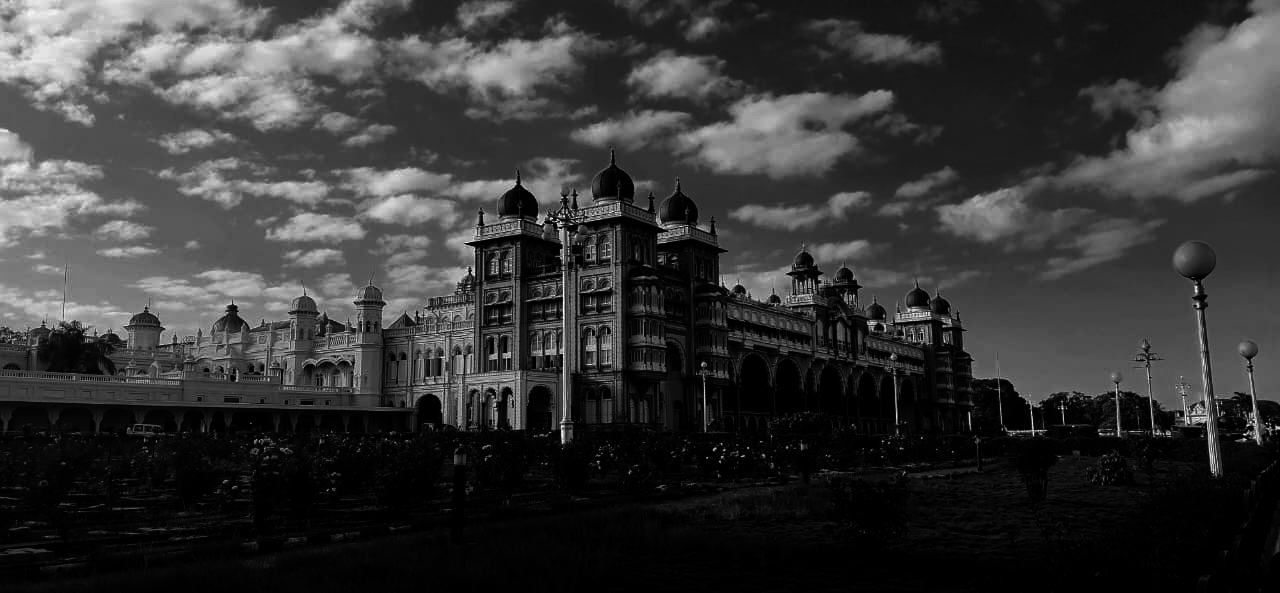

In [28]:
gamma = 4   # Set value for gamma
c = 1        # Set value for c

# Applying gamma correction
gamma_image = c * grey_image ** gamma

# Rescale values to the range of 0 to 255
gamma_image = gamma_image / np.max(gamma_image) * 255

# Displaying the transformed image
from google.colab.patches import cv2_imshow
cv2_imshow(gamma_image)


**Effect of Gamma Value on Image Contrast**

Experimenting with different gamma values while keeping constants \( c \) and \( b \) fixed can reveal insights into how gamma correction impacts image contrast:

* **Gamma Value of 1**: When the gamma value equals 1, the transformation applied to the image is linear, meaning it doesn't alter the contrast. The resulting image remains unchanged from the original grayscale image.

* **Lower Gamma Values (< 1)**: Using lower gamma values results in a low-contrast image. This is because lower gamma values reduce the difference between the pixel values, leading to a compression of the dynamic range. As a result, the image may appear flatter with less pronounced highlights and shadows.

* **Higher Gamma Values (> 1)**: Conversely, higher gamma values result in a high-contrast image. Higher gamma values expand the difference between pixel values, effectively increasing contrast. This can lead to sharper edges, more distinct highlights and shadows, and an overall more visually striking image.

By adjusting the gamma value, you can fine-tune the contrast of the image to achieve the desired visual effect. However, it's important to strike a balance and avoid over-enhancement, which can lead to loss of detail or unnatural-looking images.

## Contrast Streching

**Understanding Contrast Stretching**

Contrast stretching, also known as normalization, is a fundamental image enhancement technique used to improve the contrast of an image. It works by "stretching" the range of intensity values in the image to span a desired range of values, typically the full range of pixel values that the image type allows.

The contrast stretching formula is given by:

\[ \text{new\_image} = \left( \frac{\text{old\_image} - r1}{r2} \right) \times s2 + s1 \]

Where:
- \( \text{old\_image} \) represents the original pixel values of the image.
- \( \text{new\_image} \) represents the adjusted pixel values after contrast stretching.
- \( r1 \) and \( r2 \) are the minimum and maximum intensity values of the current range of the image.
- \( s1 \) and \( s2 \) are the minimum and maximum intensity values of the desired contrast stretching range.

Contrast stretching essentially linearly transforms the pixel values such that the minimum intensity value of the current range (\( r1 \)) is mapped to \( s1 \), and the maximum intensity value of the current range (\( r2 \)) is mapped to \( s2 \). Intermediate intensity values are linearly scaled between \( s1 \) and \( s2 \).

By adjusting the values of \( s1 \) and \( s2 \), you can control the range of intensity values in the resulting image, effectively enhancing its contrast.

In [29]:
low_con_image = cv.imread("/content/low_contrast.jpeg") # Reading a low contrast image

In [30]:
# Calculate the minimum and maximum pixel values in the low contrast image
r1 = np.min(low_con_image)
r2 = np.max(low_con_image)

# Set the desired range of intensity values for contrast stretching
s1 = 0  # Desired range min value
s2 = 255  # Desired range max value

# Print r1 and r2
print("r1:", r1)
print("r2:", r2)

r1 78
r2 206


In [31]:
# Applying contrast stretching
streched_image = ((low_con_image - r1) / (r2 - r1)) * (s2 - s1) + s1

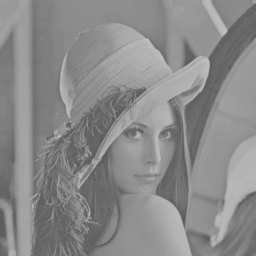

In [32]:
from google.colab.patches import cv2_imshow
cv2_imshow(low_con_image) # printing low contrast image

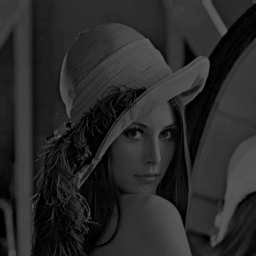

In [33]:
from google.colab.patches import cv2_imshow
cv2_imshow(streched_image) # printing the high contrast image

## Histogram Equalization

**Understanding Histogram Equalization**

Histogram equalization is a widely used image processing technique aimed at improving the contrast of an image. It achieves this by redistributing the pixel intensity values in the image so that they span a wider range of values. This redistribution effectively spreads out the most frequent intensity values, resulting in an expanded intensity range.

The process of histogram equalization typically involves the following steps:

1. **Compute Histogram**: Calculate the histogram of the input image, which represents the frequency of occurrence of each intensity value.

2. **Cumulative Distribution Function (CDF)**: Compute the cumulative distribution function of the histogram. The CDF represents the cumulative sum of histogram values.

3. **Histogram Equalization Transformation Function**: Define a transformation function that maps the input intensity values to new values based on the cumulative distribution function. This transformation function ensures that intensity values are distributed evenly across the entire range.

4. **Apply Transformation**: Apply the transformation function to each pixel in the input image, effectively equalizing the histogram and enhancing the image's contrast.

Histogram equalization is particularly effective when the usable data in the image is represented by closely spaced contrast values. It tends to increase the global contrast of images, making it especially useful for images with low local contrast.

In [34]:
import matplotlib.pyplot as plt # import the pyplot for ploting histogram

In [35]:
# Convert pixel values to integers and ensure they are in the range of 0 to 255
grey_image = (grey_image * 255 // 255).astype(int)

In [ ]:
frequency = {}  # Initialize dictionary to store frequency of grey levels

# Calculate the frequency of grey levels of all the pixels in the image
for i in range(grey_image.shape[0]):  # Traverse through height
    for j in range(grey_image.shape[1]):  # Traverse through width
        # Calculate the frequency
        frequency[grey_image[i][j]] = frequency.get(grey_image[i][j], 0) + 1

In [52]:
import pandas as pd

# Convert frequency dictionary into a DataFrame
data = pd.DataFrame({'keys': list(frequency.keys()), 'frequency': list(frequency.values())})

In [53]:
data.head() # displaying top rows

keys  frequency
0   234       2069
1   236       1658
2   238       1244
3   232       2348
4   227       3146

In [54]:
# Calculate the probability of each grey level
data["p_freq"] = data.frequency / sum(data.frequency)

In [55]:
data.head()

keys  frequency    p_freq
0   234       2069  0.002726
1   236       1658  0.002184
2   238       1244  0.001639
3   232       2348  0.003093
4   227       3146  0.004145

In [56]:
import numpy as np

# Calculate the cumulative sum of probabilities
data["cum_p_freq"] = np.cumsum(data.p_freq)

In [57]:
data.head()

keys  frequency    p_freq  cum_p_freq
0   234       2069  0.002726    0.002726
1   236       1658  0.002184    0.004910
2   238       1244  0.001639    0.006549
3   232       2348  0.003093    0.009642
4   227       3146  0.004145    0.013787

In [58]:
# Multiply the cumulative sum of probabilities by 255
data['cum_p_freq'] = data["cum_p_freq"] * 255

In [59]:
data.head()

keys  frequency    p_freq  cum_p_freq
0   234       2069  0.002726    0.695082
1   236       1658  0.002184    1.252088
2   238       1244  0.001639    1.670011
3   232       2348  0.003093    2.458823
4   227       3146  0.004145    3.515724

In [60]:
data = data.drop(['p_freq'],axis=1)

In [61]:
data.columns = ['pixel','freq','prob'] # Renaming columns

In [62]:
columns = []
for i in range(grey_image.shape[0]):  # Traversing through the height
    rows = []
    for j in range(grey_image.shape[1]):  # Traversing through the width
        rows.append(data[data.keys == grey_image[i][j]].p_freq.values[0])
        # Creating new image with pixel mapping of equalization
    columns.append(rows)

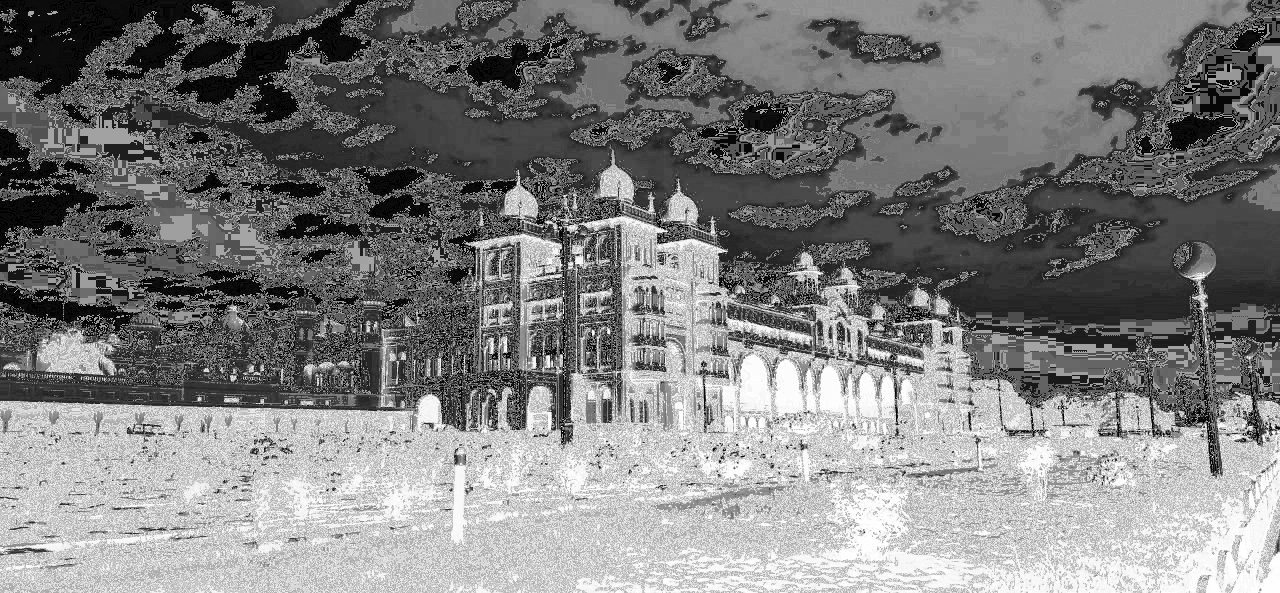

In [63]:
from google.colab.patches import cv2_imshow
cv2_imshow(np.array(columns)) # Displaying the Equilized Image

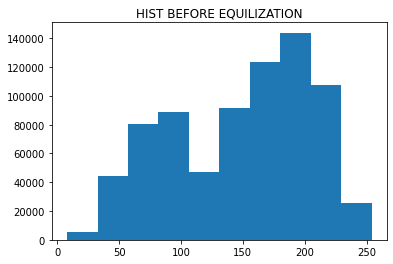

In [64]:
import matplotlib.pyplot as plt

# Display histogram before equalization
plt.hist(grey_image.flatten())
plt.title("HIST BEFORE EQUALIZATION")
plt.show()

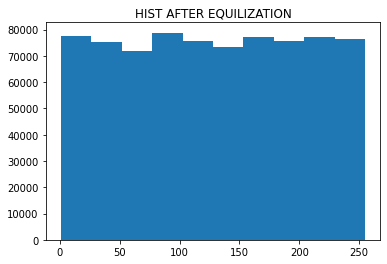

In [65]:
plt.hist(np.array(columns).flatten()) #Displaying Hist after Equilization
plt.title("HIST AFTER EQUILIZATION")
plt.show()